<a href="https://colab.research.google.com/github/LucianoPer/VPC2/blob/main/4_CNN_Arquitecturas_Clasicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Arquitecturas Clasicas con redes Neuronales convolucionales 

- **LeNet-5**

- **Alex-Net**

- **VGG-16** 

In [ ]:
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Input, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, Model
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



##**LeNet-5**

Creada a fines de 1989 por Yann LeCunn . Utilizada para el reconocimiento de digitos 

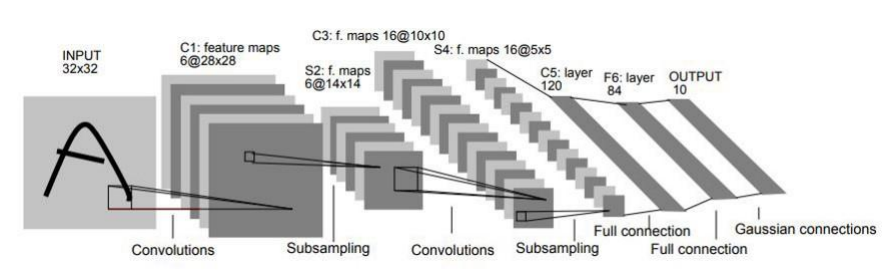

La tabla de la arquitectura anterior es :

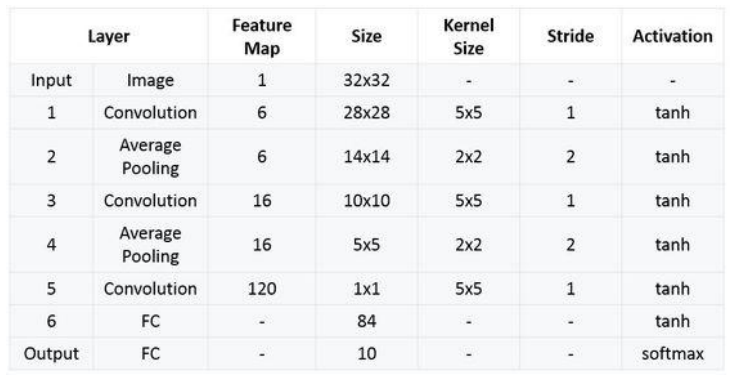

In [ ]:
#FUNCION PARA CREAR LOS BLOQUES DE LA RED NEURONAL
# inputs: Tensor de entrada
# n_layers: numero de capas convolucionales del bloque
# n_filters: numero de filtros del bloque 

def create_block(n_filters,n_layers,inputs):
  for i in range(n_layers):
    inputs = Conv2D( filters = n_filters ,  kernel_size = (5,5), padding= 'valid', activation = 'tanh')(inputs)
  inputs = AveragePooling2D( pool_size = (2,2) , strides = 2)(inputs)
  return inputs 

In [ ]:
# DEFINIMOS LA RED 
# definimos las dimensiones de la entrada
inputs = Input(shape=(32,32,1))

# Llamamos a la funcion que crea los bloques repetitivos de capas convolucionales y al final le agrega una MaxPool
x = create_block( 6, 1, inputs )
x = create_block( 16, 1, x )
x = Conv2D( filters = 120 ,  kernel_size = (5,5), padding= 'valid', activation = 'tanh')(x)
x = Flatten()(x)
x = Dense( units = 84, activation = 'tanh')(x)
out =  Dense( units = 10, activation = 'softmax')(x)

In [ ]:
model = Model( inputs, out)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)              

### Cargamos el dataset de Mnist que contiene digitos 

In [ ]:
from keras.datasets import mnist

In [ ]:
# CARGA DEL DATASET 
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 60 mil imagenes de 28x28x1 (grises) / 10 mil imagenes para test
print('Train Shape : ',X_train.shape)
print('Test Shape : ',X_test.shape)

Train Shape :  (60000, 28, 28)
Test Shape :  (10000, 28, 28)


Como las dimensiones de la imagen del dataset de digitos de MNIST tiene una dim de 28x28, haremos una modificacion en la red de LeNet-5 cambiando el tamano de entrada y el  padding de la primer capa convolucional para que conserve los 28x28 

In [ ]:
# RE-DEFINIMOS LA RED 
# definimos las dimensiones de la entrada
inp = Input(shape=(28,28,1))
inputs = Conv2D( filters = 6 ,  kernel_size = (5,5), padding= 'same', activation = 'tanh')(inp)
inputs = AveragePooling2D( pool_size = (2,2) , strides = 2)(inputs)
inputs = Conv2D( filters = 16 ,  kernel_size = (5,5), padding= 'valid', activation = 'tanh')(inputs)
inputs = AveragePooling2D( pool_size = (2,2) , strides = 2)(inputs)
inputs = Conv2D( filters = 120 ,  kernel_size = (5,5), padding= 'valid', activation = 'tanh')(inputs)
inputs = Flatten()(inputs)
inputs = Dense( units = 84, activation = 'tanh')(inputs)
out =  Dense( units = 10, activation = 'softmax')(inputs)

In [ ]:
model = Model( inp, out)
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_13 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_14 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_6 (Flatten)          (None, 120)             

In [ ]:
# Definimos una funcion que grafique las primeras imagenes
def Plotear_Im(X_train):
  for i in range(9):
    # 331 --> primer imagen en matriz 3x3
    plt.subplot(330+1+i)
    plt.imshow(X_train[i] , cmap=plt.get_cmap('gray'))
  plt.show()

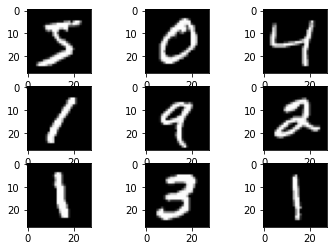

In [ ]:
Plotear_Im(X_train)

In [ ]:
# Normalizamos las imagenes y las centramos 
X_train_n = (X_train/255) - 0.5
X_test_n = (X_test/255) - 0.5

In [ ]:
# Hacemos un reshape para que las imagenes tengan una dimension mas indicando el canal [28x28] --->>> [28x28x1]
X_train_n = X_train_n.reshape((X_train_n.shape[0],28,28,1))
X_test_n = X_test_n.reshape((X_test_n.shape[0],28,28,1))
X_train_n.shape

(60000, 28, 28, 1)

In [ ]:
# Transformamos el target a variables categoricas ONE HOT ENCODING
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
model.compile( 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train_n,y_train_cat,epochs=10,validation_data=(X_test_n,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - accuracy: 0.9281 - val_loss: 0.1207 - val_accuracy: 0.9639
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0943 - accuracy: 0.9711 - val_loss: 0.0780 - val_accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9789 - val_loss: 0.0656 - val_accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9869 - val_loss: 0.0584 - val_accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0554 - val_accuracy: 0.9825
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0660 - val_accuracy:

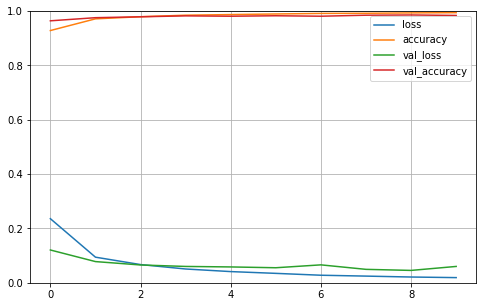

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Valores Reales :  [7 2 1 0 4 1 4 9 5]
Predicciones :  [7 2 1 0 4 1 4 9 5]


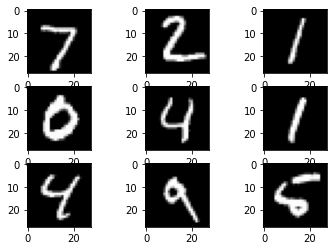

In [ ]:
print('Valores Reales : ',y_test[0:9])
predicciones = model.predict(X_test_n[:9])
print('Predicciones : ',np.argmax(predicciones, axis=1))
Plotear_Im(X_test[:9])

**Si bien los datos de MNIST estan bastante limpios y depurados, comparando la red Le_Net con una red  convolucional simple los resultados son superiores.**

##**Alex-Net**

Creada en 2012. Segundo puesto en ImageNet Large-Scale Visual Recognition Challenge


**Caracteristicas principales:**

● Rectified Linear Units (relus)

● Uso de múltiples GPUs para implementar el modelo

● Dropout

● Local Response Normalization, no tan usado hoy en día

● Capas Pool con ventanas superpuestas

● Data Augmentation

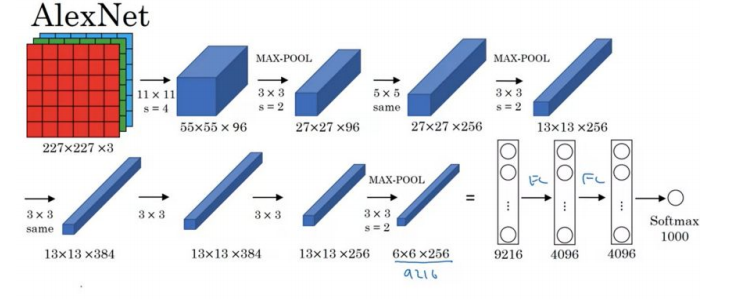

La tabla de la arquitectura anterior es:

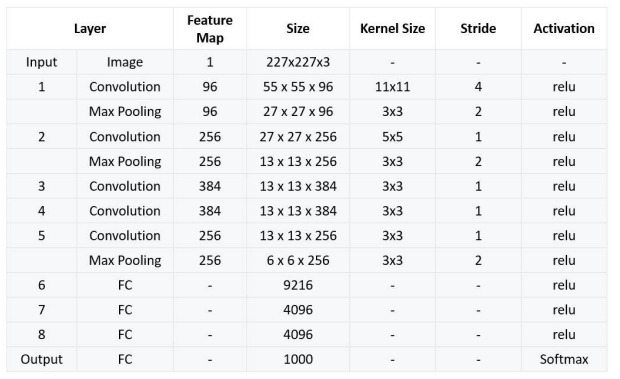

##**VGG - 16** - Visual Geometry Group 

RED creada en 2014 con 138 millones de parametros entrenables ( 16 capas ), se va dividiendo por dos la dimension de la imagen y se va duplicando la cantidad de canales, a medida que se avanza en las capas. 

- Capas de Pool ---> Dividen por dos
- Capas de Conv ---> multiplican por dos el numero de canales (padding same)


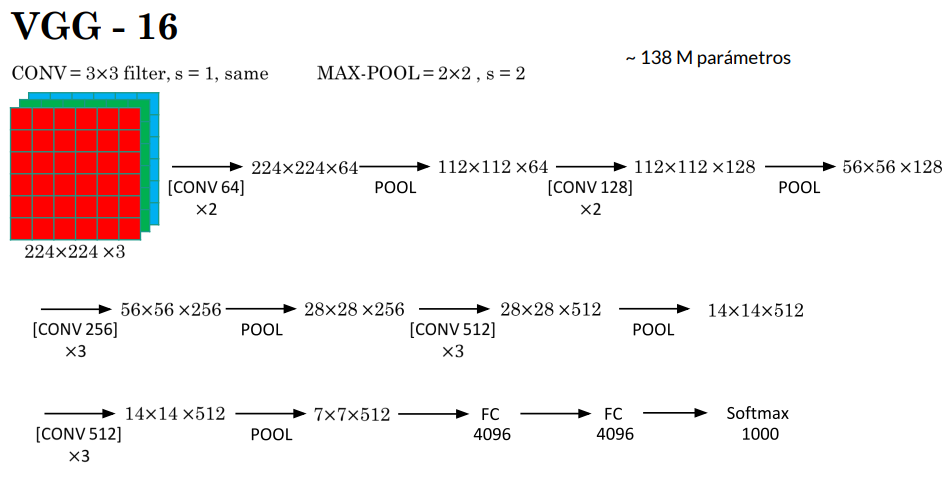

Armamos la red con el **metodo funcional** de KERAS 

Utilizamos el dataset de perros y gatos ya utilizado anteriormente y el generador de imagenes. 

DATASET descargamos directamente el archivo para hacerlo de una manera mas rapida que subir el zip

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2020-11-24 00:22:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  69.3MB/s    in 0.9s    

2020-11-24 00:22:08 (69.3 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
! unzip -q cats_and_dogs_filtered.zip

replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


Definimos la direccion del directorio donde estan las imagenes al cual apuntaremos con el generador de lotes.

In [ ]:
train_dir =  'cats_and_dogs_filtered/train'
validation_dir = 'cats_and_dogs_filtered/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224,244),
    batch_size = 20,
    #class_mode = 'binary',
)

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    directory = validation_dir,
    target_size = (224,244),
    batch_size = 20,
    #class_mode = 'binary',
)

Found 1000 images belonging to 2 classes.


In [ ]:
# Funcion para graficar 5 imagenes en una sola fila 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

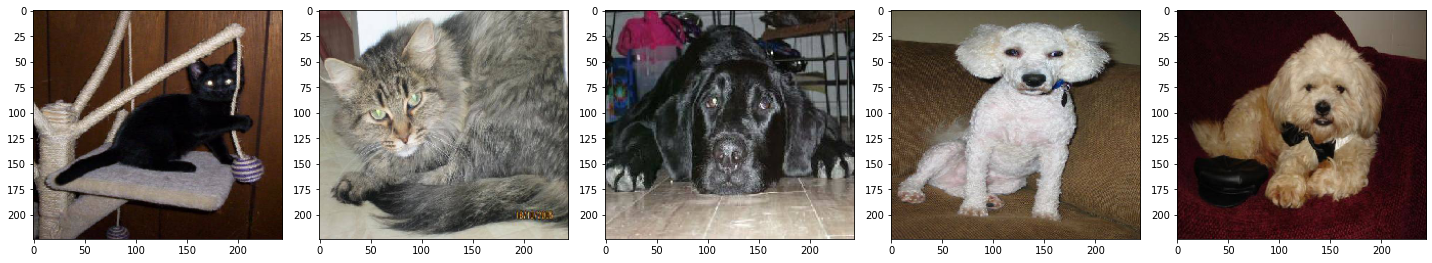

In [ ]:
# PARA VER UN GRUPO DE IMAGENES DE EJEMPLO DESCOMENTAR LAS SIEGUIENTES LINEAS
#augmented_images = [train_generator[0][0][i] for i in range(5)]
#plotImages(augmented_images)

Definimos el modelo con el metodo funcional de keras (En este caso no utilizamos el Sequential el cual se utiliza para metodos secuenciales)

In [ ]:
#FUNCION PARA CREAR LOS BLOQUES DE LA RED NEURONAL
# inputs: Tensor de entrada
# n_layers: numero de capas convolucionales del bloque
# n_filters: numero de filtros del bloque 

def create_block(n_filters,n_layers,inputs):
  for i in range(n_layers):
    inputs = Conv2D( filters = n_filters ,  kernel_size = (3,3), padding= 'same', activation = 'relu')(inputs)
  inputs = MaxPool2D( pool_size = (2,2) , strides = 2)(inputs)
  return inputs 


Creamos la red VGG-16

In [ ]:
# DEFINIMOS LA RED 
# definimos las dimensiones de la entrada
inputs = Input(shape=(224,224,3))

# Llamamos a la funcion que crea los bloques repetitivos de capas convolucionales y al final le agrega una MaxPool
x = create_block( 64, 2, inputs )
x = create_block( 128, 2, x )
x = create_block( 256, 3, x )
x = create_block( 512, 3, x )
x = create_block( 512, 3, x )
x = Flatten()(x)
x = Dense( units = 4096, activation = 'relu')(x)
x = Dense( units = 4096, activation = 'relu')(x) 
out =  Dense( units = 1, activation = 'sigmoid')(x)

In [ ]:
model = Model( inputs, out)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 56, 56, 128)      

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

model.compile(optimizer= Adam(lr=1e-4), loss = categorical_crossentropy, metrics=['accuracy','acc'])

In [ ]:
history =  model.fit_generator (train_generator, steps_per_epoch=100, epochs=20, validation_data= validation_generator, validation_steps = 50)